In [1]:
import pandas as pd
import collections
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor

In [2]:
# The data frame is called house_info
raw_info = pd.read_csv("kc_house_data.csv",error_bad_lines=False)

In [3]:
raw_info

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
house_info = pd.DataFrame({'Bedrooms':raw_info.bedrooms, 'Bathrooms':raw_info.bathrooms, 'Floors':raw_info.floors, 
                           'Year Built':raw_info.yr_built, 'Year Renoveted':raw_info.yr_renovated,
                           'Size of Basement':raw_info.sqft_basement,'Condition':raw_info.condition,
                          'Size of Above':raw_info.sqft_above,'Location':raw_info.zipcode,
                          'Price':raw_info.price})

In [5]:
house_info

,Bedrooms,Bathrooms,Floors,Year Built,Year Renoveted,Size of Basement,Condition,Size of Above,Location,Price
0,3,1.00,1.0,1955,0.0,0.0,3,1180,98178,221900.0
1,3,2.25,2.0,1951,1991.0,400.0,3,2170,98125,538000.0
2,2,1.00,1.0,1933,NaN,0.0,3,770,98028,180000.0
3,4,3.00,1.0,1965,0.0,910.0,5,1050,98136,604000.0
4,3,2.00,1.0,1987,0.0,0.0,3,1680,98074,510000.0
...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,2009,0.0,0.0,3,1530,98103,360000.0
21593,4,2.50,2.0,2014,0.0,0.0,3,2310,98146,400000.0
21594,2,0.75,2.0,2009,0.0,0.0,3,1020,98144,402101.0
21595,3,2.50,2.0,2004,0.0,0.0,3,1600,98027,400000.0


In [6]:
house_info.describe()

,Bedrooms,Bathrooms,Floors,Year Built,Year Renoveted,Condition,Size of Above,Location,Price
count,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,3.373200,2.115826,1.494096,1970.999676,83.636778,3.409825,1788.596842,98077.951845,5.402966e+05
std,0.926299,0.768984,0.539683,29.375234,399.946414,0.650546,827.759761,53.513072,3.673681e+05
min,1.000000,0.500000,1.000000,1900.000000,0.000000,1.000000,370.000000,98001.000000,7.800000e+04
25%,3.000000,1.750000,1.000000,1951.000000,0.000000,3.000000,1190.000000,98033.000000,3.220000e+05
50%,3.000000,2.250000,1.500000,1975.000000,0.000000,3.000000,1560.000000,98065.000000,4.500000e+05
75%,4.000000,2.500000,2.000000,1997.000000,0.000000,4.000000,2210.000000,98118.000000,6.450000e+05
max,33.000000,8.000000,3.500000,2015.000000,2015.000000,5.000000,9410.000000,98199.000000,7.700000e+06


In [12]:
locationzip =raw_info.zipcode
locationzip

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 21597, dtype: int64

In [16]:
index = []
for i,x in enumerate(raw_info.lat):
    if x == 47.618:index.append(i)
    if x == 47.528:index.append(i)
    if x == 47.502:index.append(i)  
    if x == 47.530:index.append(i)
    if x == 47.567:index.append(i)
    if x == 47.733:index.append(i)   
    if x == 47.648:index.append(i)

index
for i,x in enumerate(index):print(i,locationzip[x])

0 98178
1 98199
2 98106
3 98072
4 98075
5 98019
6 98116
7 98106
8 98178
9 98108
10 98199
11 98056
12 98136
13 98065
14 98040
15 98029
16 98006
17 98024
18 98106
19 98059
20 98034
21 98118
22 98056
23 98029
24 98119
25 98199
26 98199
27 98040
28 98034
29 98006
30 98006
31 98146
32 98106
33 98072
34 98052
35 98126
36 98108
37 98199
38 98059
39 98118
40 98118
41 98122
42 98027
43 98027
44 98004
45 98199


In [19]:
def PRICE_BEDROOM(AMOUNT_BEDROOM):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bed = house_info["Bedrooms"].tolist()
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)

    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])
    
    bedrooms_index = []
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BEDROOM:bedrooms_index.append(i)
    len(bedrooms_index)

    bedrooms_eastking = []
    for i in bedrooms_index:
        if locations[i] == zip_loca[0] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[1] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[2] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[3] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[4]: bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[5] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[6] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[7]: bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[8] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[9] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[10] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[11] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[12]: bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[13] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[14] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[15] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[16]: bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[17] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[18]: bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[19] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[20]: bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[21] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[22] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[23] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[24] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[25] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[26] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[27] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[28]: bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[29] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[30] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[31]: bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[32] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[33] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[34] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[35]: bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[36] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[37] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[38] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[39] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[40] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[41] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[42] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[43]: bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[44] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[45] : bedrooms_eastking.append(i)
    price = house_info["Price"].tolist()

    price_eastking = []
    for i in bedrooms_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_bedrooms = house_info["Bedrooms"].value_counts().index.tolist()
price_bedrooms_eastking = []
for i in no_of_bedrooms:
    price_bedrooms_eastking.append(PRICE_BEDROOM(i))
price_bedrooms_eastking= sum(price_bedrooms_eastking, [])
len(price_bedrooms_eastking)

8349

In [21]:
def AMOUNT_BEDROOMS(AMOUNT_BEDROOM):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bed = house_info["Bedrooms"].tolist()
    X_value = []
    bedroom_index = []
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])
        
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BEDROOM:bedroom_index.append(i)

    for i in bedroom_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[35]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[36] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[37] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[38] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[39]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[40] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[41]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[42] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[43]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[44] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[45] : X_value.append(AMOUNT_BEDROOM)
    
    return X_value
no_of_bedrooms = house_info["Bedrooms"].value_counts().index.tolist()
amount_bedrooms_eastking = []
for i in no_of_bedrooms:
    amount_bedrooms_eastking.append(AMOUNT_BEDROOMS(i))
amount_bedrooms_eastking= sum(amount_bedrooms_eastking, [])
len(amount_bedrooms_eastking)

8349

In [22]:
regressiondata1 = pd.DataFrame({'Amount_of_Bedrooms':amount_bedrooms_eastking,
                                'Price':price_bedrooms_eastking})
#regressiondata1 = regressiondata1.drop(3830)
regressiondata1

,Amount_of_Bedrooms,Price
0,3,221900.0
1,3,229500.0
2,3,395000.0
3,3,2000000.0
4,3,937000.0
...,...,...
8344,8,430000.0
8345,8,575000.0
8346,10,1150000.0
8347,10,650000.0


<ipython-input-79-271118669217>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million',


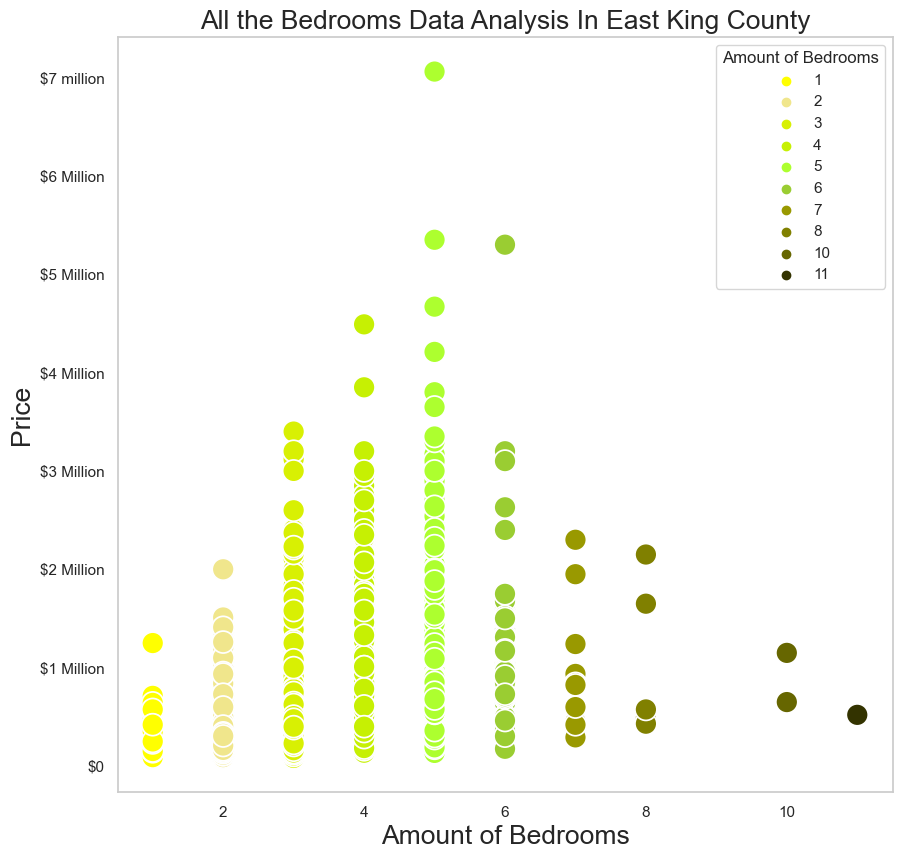

In [79]:
x = regressiondata1['Amount_of_Bedrooms']
y = regressiondata1['Price']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003', '#C6F003','#ADFF2F',
          '#9ACD32','#999900','#808000','#666600','#333300']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata1, x=x, y=y,s=250,hue='Amount_of_Bedrooms',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bedrooms Data Analysis In East King County',size=19)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Amount of Bedrooms')
plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million',
                    '$6 Million','$7 million'])
plt.show()

In [36]:
train_df, test_df = train_test_split(regressiondata1, test_size=0.10, shuffle=False)

In [37]:
X_train, y_train = train_df[['Amount_of_Bedrooms']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Bedrooms']], test_df[['Price']]

In [38]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [39]:
Quantile_regression = pd.DataFrame({'Amount_of_Bedrooms': X_test.reset_index()['Amount_of_Bedrooms'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [57]:
Quantile_regression[800:]

,Amount_of_Bedrooms,0.1,0.5,0.9,Price
800,1,210001.859351,356003.957648,6.335081e+05,267000.0
801,1,210001.859351,356003.957648,6.335081e+05,250000.0
802,1,210001.859351,356003.957648,6.335081e+05,295000.0
803,1,210001.859351,356003.957648,6.335081e+05,575000.0
804,1,210001.859351,356003.957648,6.335081e+05,415000.0
805,1,210001.859351,356003.957648,6.335081e+05,199900.0
806,1,210001.859351,356003.957648,6.335081e+05,152275.0
807,1,210001.859351,356003.957648,6.335081e+05,385000.0
808,1,210001.859351,356003.957648,6.335081e+05,375000.0
809,1,210001.859351,356003.957648,6.335081e+05,235000.0


In [50]:
melted_data = pd.melt(Quantile_regression, id_vars=['Amount_of_Bedrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.drop(range(2505,3340))

In [51]:
melted_data

,Amount_of_Bedrooms,variable,value
0,5,0.1,3.513981e+05
1,5,0.1,3.513981e+05
2,5,0.1,3.513981e+05
3,5,0.1,3.513981e+05
4,5,0.1,3.513981e+05
...,...,...,...
2500,8,0.9,1.607982e+06
2501,8,0.9,1.607982e+06
2502,10,0.9,1.607982e+06
2503,10,0.9,1.607982e+06


In [58]:
Quantileregression_updated = pd.DataFrame({'Amount_of_Bedrooms':[1,2,3,4,5,6,7,8,9,10,11],
    '0.1':[210001.859351,210001.859351,210001.859351,351398.135612,351398.135612,351398.135612,
          351398.135612,351398.135612,351398.135612,351398.135612,351398.135612],
'0.5':[356003.957648,356003.957648,356003.957648,749992.492484,749992.492484,749992.492484,
      749992.492484,749992.492484,749992.492484,749992.492484,749992.492484],
'0.9':[6.335081e+05,6.335081e+05,6.335081e+05,1.607982e+06,1.607982e+06,1.607982e+06,1.607982e+06,
      1.607982e+06,1.607982e+06,1.607982e+06,1.607982e+06]})
Quantileregression_updated

,Amount_of_Bedrooms,0.1,0.5,0.9
0,1,210001.859351,356003.957648,633508.1
1,2,210001.859351,356003.957648,633508.1
2,3,210001.859351,356003.957648,633508.1
3,4,351398.135612,749992.492484,1607982.0
4,5,351398.135612,749992.492484,1607982.0
5,6,351398.135612,749992.492484,1607982.0
6,7,351398.135612,749992.492484,1607982.0
7,8,351398.135612,749992.492484,1607982.0
8,9,351398.135612,749992.492484,1607982.0
9,10,351398.135612,749992.492484,1607982.0


In [59]:
melted_data = pd.melt(Quantileregression_updated, id_vars=['Amount_of_Bedrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

,Amount_of_Bedrooms,Percentile,value
0,1,0.1,2.100019e+05
1,2,0.1,2.100019e+05
2,3,0.1,2.100019e+05
3,4,0.1,3.513981e+05
4,5,0.1,3.513981e+05
5,6,0.1,3.513981e+05
6,7,0.1,3.513981e+05
7,8,0.1,3.513981e+05
8,9,0.1,3.513981e+05
9,10,0.1,3.513981e+05


<ipython-input-68-74d7ebb01894>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million',


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.2 Million'),
 Text(0, 1400000.0, '$1.4 Million'),
 Text(0, 1600000.0, '$1.6 Million'),
 Text(0, 1800000.0, '')]

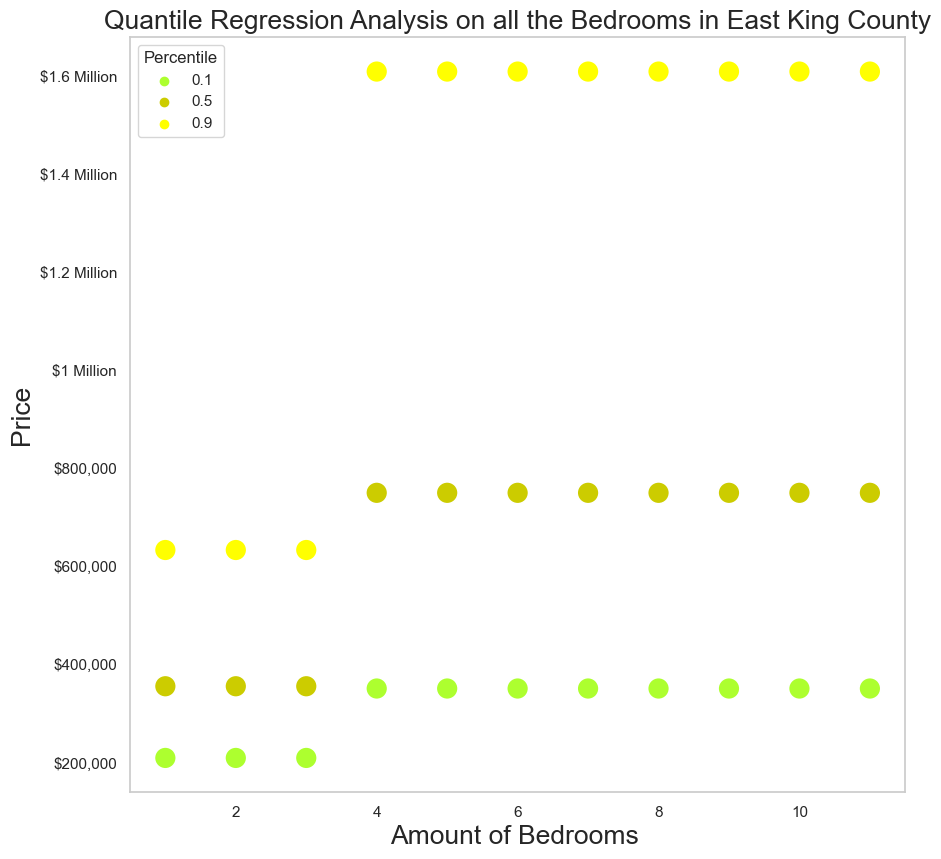

In [68]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax = sns.scatterplot(data=melted_data, x="Amount_of_Bedrooms", 
                     y='value',s=250,hue='Percentile',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bedrooms")
plt.gcf().set_size_inches((10,10))
ax.set_title('Quantile Regression Analysis on all the Bedrooms in East King County',size=19)
plt.xlabel("Amount of Bedrooms ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million',
'$1.2 Million','$1.4 Million','$1.6 Million'])

<ipython-input-69-4d55de30c2c1>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million',


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.2 Million'),
 Text(0, 1400000.0, '$1.4 Million'),
 Text(0, 1600000.0, '$1.6 Million'),
 Text(0, 1800000.0, '')]

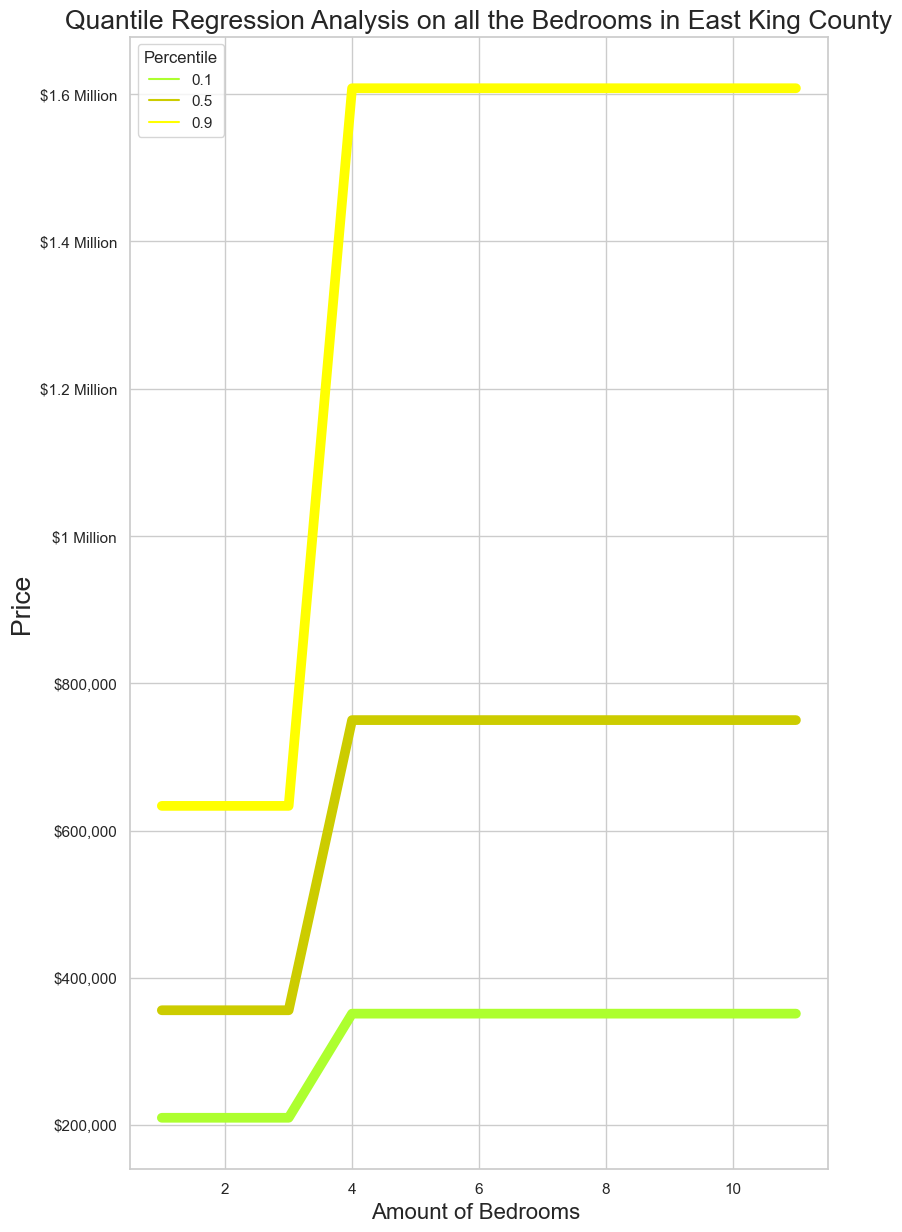

In [69]:
sns.set_style("whitegrid")
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax=sns.lineplot( data=melted_data, x="Amount_of_Bedrooms",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Bedrooms in East King County',size=19)
plt.xlabel("Amount of Bedrooms ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million',
'$1.2 Million','$1.4 Million','$1.6 Million'])

In [70]:
(Quantile_regression['Price'] > Quantile_regression['0.1']).value_counts()

True     750
False     85
dtype: int64

In [73]:
i = 0
y= 0
x = []
while i < 750:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 85:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [71]:
(Quantile_regression['Price'] > Quantile_regression['0.5']).value_counts()

False    476
True     359
dtype: int64

In [74]:
i = 0
y= 0
x = []
while i < 476:
    x.append('How Many Times The Predictionwas Was Right')
    i+=1
while y < 359:
    x.append('How Many Times The Predictionwas Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [72]:
(Quantile_regression['Price'] > Quantile_regression['0.9']).value_counts()

False    763
True      72
dtype: int64

In [75]:
i = 0
y= 0
x = []
while i < 763:
    x.append('How Many Times The Predictionwas Was Right')
    i+=1
while y < 72:
    x.append('How Many Times The Predictionwas Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

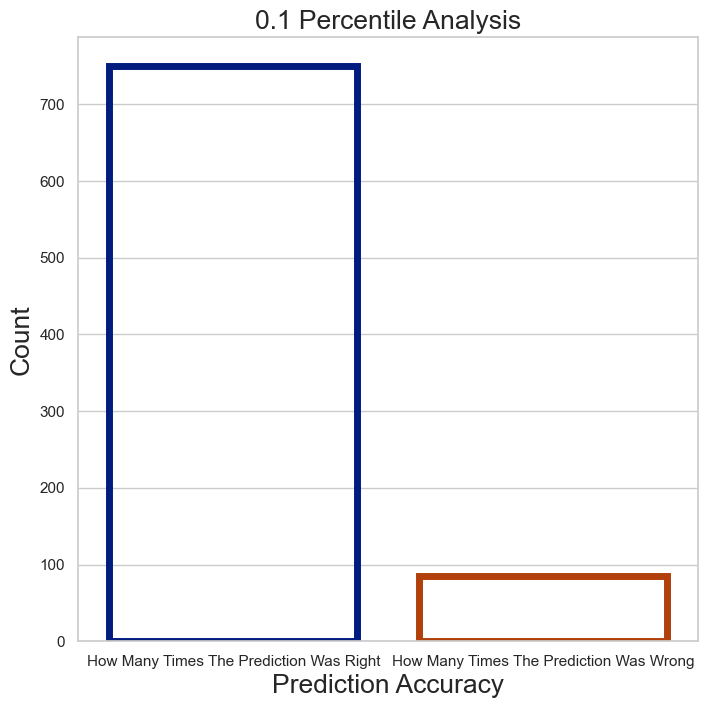

In [76]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

Text(0, 0.5, 'Count')

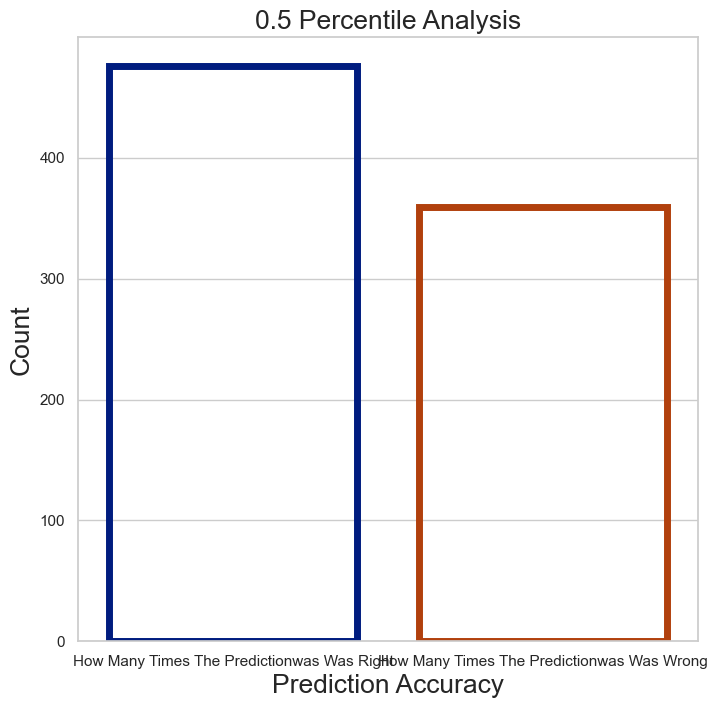

In [77]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

Text(0, 0.5, 'Count')

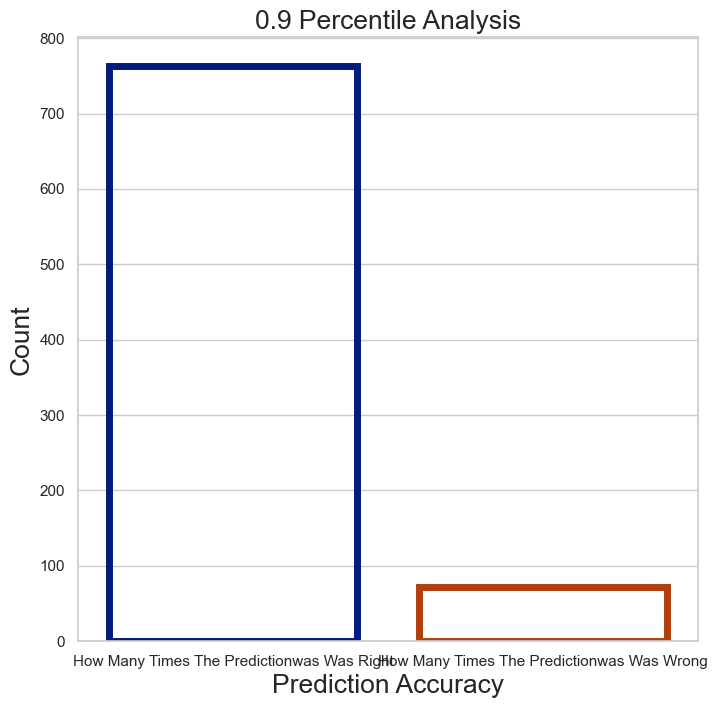

In [78]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [80]:
Predictions = []
for i in regressiondata1.Amount_of_Bedrooms:
    if i == 1:Predictions.append('Between: $210,001 - $633,508')
    if i == 2: Predictions.append('Between: $210,001  - $633,508')
    if i == 3:Predictions.append('Between: $210,001  - $633,508')
    if i == 4:Predictions.append('Between: $351,398 - $1,607,982') 
    if i == 5:Predictions.append('Between: $351,398 - $1,607,982')
    if i == 6:Predictions.append('Between: $351,398 - $1,607,982')
    if i == 7:Predictions.append('Between: $351,398 - $1,607,982')
    if i == 8:Predictions.append('Between: $351,398 - $1,607,982')
    if i == 9:Predictions.append('Between: $351,398 - $1,607,982')
    if i == 10:Predictions.append('Between: $351,398 - $1,607,982')
    if i == 11:Predictions.append('Between: $351,398 - $1,607,982')
len(Predictions)

8349

In [81]:
price = []
for i in regressiondata1.Price:
    price.append("${:,.0f}".format(i))

In [82]:
Prediction = pd.DataFrame({'Amount of Bedrooms':regressiondata1.Amount_of_Bedrooms,
                           'Prediction':Predictions,'Actual Price':price})
Prediction

,Amount of Bedrooms,Prediction,Actual Price
0,3,"Between: $210,001 - $633,508","$221,900"
1,3,"Between: $210,001 - $633,508","$229,500"
2,3,"Between: $210,001 - $633,508","$395,000"
3,3,"Between: $210,001 - $633,508","$2,000,000"
4,3,"Between: $210,001 - $633,508","$937,000"
...,...,...,...
8344,8,"Between: $351,398 - $1,607,982","$430,000"
8345,8,"Between: $351,398 - $1,607,982","$575,000"
8346,10,"Between: $351,398 - $1,607,982","$1,150,000"
8347,10,"Between: $351,398 - $1,607,982","$650,000"


In [83]:
def AMOUNT_BATHROOMS(AMOUNT_BATHROOM):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bed = house_info["Bathrooms"].tolist()
    X_value = []
    bathroom_index = []
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])
        
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BATHROOM:bathroom_index.append(i)

    for i in bathroom_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[35] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[36]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[37] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[38] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[39] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[40]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[41] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[42]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[43] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[44]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[45] : X_value.append(AMOUNT_BATHROOM)
    return X_value
no_of_bathrooms = house_info["Bathrooms"].value_counts().index.tolist()
amount_bathrooms_eastking = []
for i in no_of_bathrooms:
    amount_bathrooms_eastking.append(AMOUNT_BATHROOMS(i))
amount_bathrooms_eastking= sum(amount_bathrooms_eastking, [])
len(amount_bathrooms_eastking)

8349

In [85]:
def PRICE_BATHROOM(AMOUNT_BATHROOM):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bath = house_info["Bathrooms"].tolist()

    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
            
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])
        
    bathroom_index = []
    for i,x in enumerate(amount_bath):
        if x == AMOUNT_BATHROOM:bathroom_index.append(i)
    len(bathroom_index)

    bathroom_eastking = []
    for i in bathroom_index:
        if locations[i] == zip_loca[0] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[1] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[2] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[3] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[4]: bathroom_eastking.append(i)
        elif locations[i] == zip_loca[5] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[6] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[7]: bathroom_eastking.append(i)
        elif locations[i] == zip_loca[8] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[9] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[10] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[11] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[12]: bathroom_eastking.append(i)
        elif locations[i] == zip_loca[13] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[14] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[15] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[16]: bathroom_eastking.append(i)
        elif locations[i] == zip_loca[17] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[18]: bathroom_eastking.append(i)
        elif locations[i] == zip_loca[19] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[20]: bathroom_eastking.append(i)
        elif locations[i] == zip_loca[21] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[22] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[23] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[24] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[25] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[26] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[27] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[28]: bathroom_eastking.append(i)
        elif locations[i] == zip_loca[29] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[30] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[31]: bathroom_eastking.append(i)
        elif locations[i] == zip_loca[32] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[33] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[34] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[35]: bathroom_eastking.append(i)
        elif locations[i] == zip_loca[36] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[37] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[38] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[39] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[40] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[41] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[42] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[43]: bathroom_eastking.append(i)
        elif locations[i] == zip_loca[44] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[45] : bathroom_eastking.append(i)
        
    price = house_info["Price"].tolist()

    price_eastking = []
    for i in bathroom_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_bathrooms = house_info["Bathrooms"].value_counts().index.tolist()
price_bathroom_eastking = []
for i in no_of_bathrooms:
    price_bathroom_eastking.append(PRICE_BATHROOM(i))
price_bathroom_eastking = sum(price_bathroom_eastking, [])
len(price_bathroom_eastking)

8349

In [87]:
regressiondata2 = pd.DataFrame({'Amount_of_Bathrooms':amount_bathrooms_eastking,
                                'Price':price_bathroom_eastking})
k = regressiondata2.Amount_of_Bathrooms.value_counts()
len(k)

25

<ipython-input-163-0340d70c7268>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million',


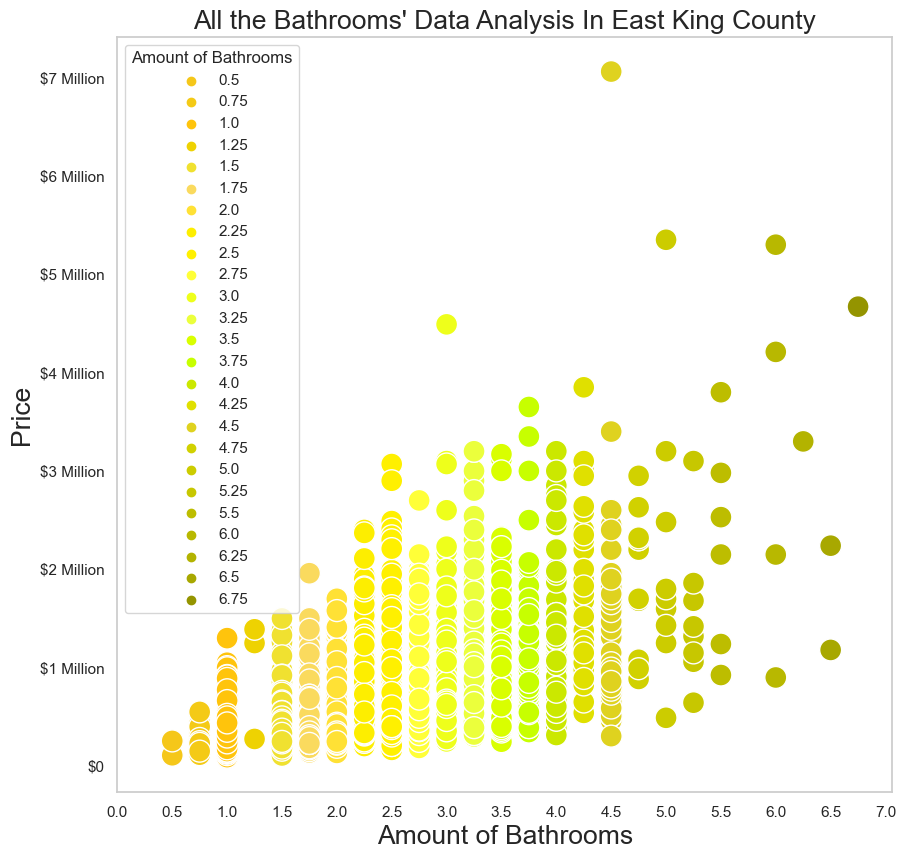

In [163]:
x = regressiondata2['Amount_of_Bathrooms']
y = regressiondata2['Price']
flatui = [
'#f5c71a', '#f4ca16','#ffc40c','#eed202','#f0e130',
'#fada5e','#ffe135','#fdee00','#fff000','#ffff38',
'#eeff1b','#ebff3c', '#d9ff00','#c7ff00','#cbe800',
'#e0e000','#dfd21f','#d1d100','#cccc00','#c7c700','#bdbd00',
'#b8b800','#b3b300','#a8a800','#949400']



plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata2, x=x, y=y,s=250, linewidth = 1,
                     hue='Amount_of_Bathrooms',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bathrooms\' Data Analysis In East King County',size=19)
plt.xlabel("Amount of Bathrooms", size=19)
plt.legend(title='Amount of Bathrooms')
plt.ylabel("Price", size=19)
plt.xticks(np.arange(0,7.5,0.5))
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million',
                    '$5 Million', '$6 Million','$7 Million'])
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()

plt.show()

In [143]:
train_df, test_df = train_test_split(regressiondata2, test_size=0.10, shuffle=False)

In [144]:
X_train, y_train = train_df[['Amount_of_Bathrooms']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Bathrooms']], test_df[['Price']]

In [145]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [146]:
Quantile_regression1 = pd.DataFrame({'Amount_of_Bathrooms': X_test.reset_index()['Amount_of_Bathrooms'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [147]:
Quantile_regression1

,Amount_of_Bathrooms,0.1,0.5,0.9,Price
0,3.50,536188.282156,854990.305089,1.612980e+06,1610000.0
1,3.50,536188.282156,854990.305089,1.612980e+06,1700000.0
2,3.50,536188.282156,854990.305089,1.612980e+06,1040000.0
3,3.50,536188.282156,854990.305089,1.612980e+06,935000.0
4,3.50,536188.282156,854990.305089,1.612980e+06,3170000.0
...,...,...,...,...,...
830,0.50,200002.046717,325004.382631,5.500085e+05,255000.0
831,6.25,536188.282156,854990.305089,1.612980e+06,3300000.0
832,6.75,536188.282156,854990.305089,1.612980e+06,4670000.0
833,6.50,536188.282156,854990.305089,1.612980e+06,1180000.0


In [148]:
Quantileregression_updated = pd.DataFrame({'Amount_of_Bathrooms':[0.50,0.25,0.75,1.0,1.25,1.5,
                                                                  1.75,2.0,2.5,2.25,2.75,
                                                                  
                                                                  3.0,3.25,3.5,3.75,4.0,
                                                                  4.25,4.5,4.75,5.0,5.25,5.5,5.75,
                                                                  6.0,6.25,6.5,7.0],
    '0.1':[200002.046717,200002.046717,200002.046717,200002.046717,200002.046717,200002.046717,
          200002.046717,200002.046717,200002.046717,200002.046717,200002.046717,
           
        536188.282156,536188.282156,536188.282156,536188.282156,536188.282156,536188.282156,
        536188.282156,536188.282156,536188.282156,536188.282156,536188.282156,536188.282156,
        536188.282156,536188.282156,536188.282156,536188.282156],
                                           
 '0.5':[325004.382631,325004.382631,325004.382631,325004.382631,325004.382631,325004.382631,
       325004.382631,325004.382631,325004.382631,325004.382631,325004.382631,
       
       854990.305089,854990.305089,854990.305089,854990.305089,854990.305089,854990.305089,
       854990.305089,854990.305089,854990.305089,854990.305089,854990.305089,854990.305089,
      854990.305089,854990.305089,854990.305089,854990.305089],
   
    '0.9':[5.500085e+05,5.500085e+05,5.500085e+05,5.500085e+05,5.500085e+05,5.500085e+05,
         5.500085e+05,5.500085e+05,5.500085e+05,5.500085e+05,5.500085e+05,
          
          1.612980e+06,1.612980e+06,1.612980e+06,1.612980e+06,1.612980e+06,1.612980e+06,
          1.612980e+06,1.612980e+06,1.612980e+06,1.612980e+06,1.612980e+06,1.612980e+06,
          1.612980e+06,1.612980e+06,1.612980e+06,1.612980e+06]})
Quantileregression_updated

,Amount_of_Bathrooms,0.1,0.5,0.9
0,0.50,200002.046717,325004.382631,550008.5
1,0.25,200002.046717,325004.382631,550008.5
2,0.75,200002.046717,325004.382631,550008.5
3,1.00,200002.046717,325004.382631,550008.5
4,1.25,200002.046717,325004.382631,550008.5
5,1.50,200002.046717,325004.382631,550008.5
6,1.75,200002.046717,325004.382631,550008.5
7,2.00,200002.046717,325004.382631,550008.5
8,2.50,200002.046717,325004.382631,550008.5
9,2.25,200002.046717,325004.382631,550008.5


In [149]:
melted_data = pd.melt(Quantileregression_updated, id_vars=['Amount_of_Bathrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

,Amount_of_Bathrooms,Percentile,value
0,0.50,0.1,2.000020e+05
1,0.25,0.1,2.000020e+05
2,0.75,0.1,2.000020e+05
3,1.00,0.1,2.000020e+05
4,1.25,0.1,2.000020e+05
...,...,...,...
76,5.75,0.9,1.612980e+06
77,6.00,0.9,1.612980e+06
78,6.25,0.9,1.612980e+06
79,6.50,0.9,1.612980e+06


<ipython-input-164-9e94b322be01>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000',


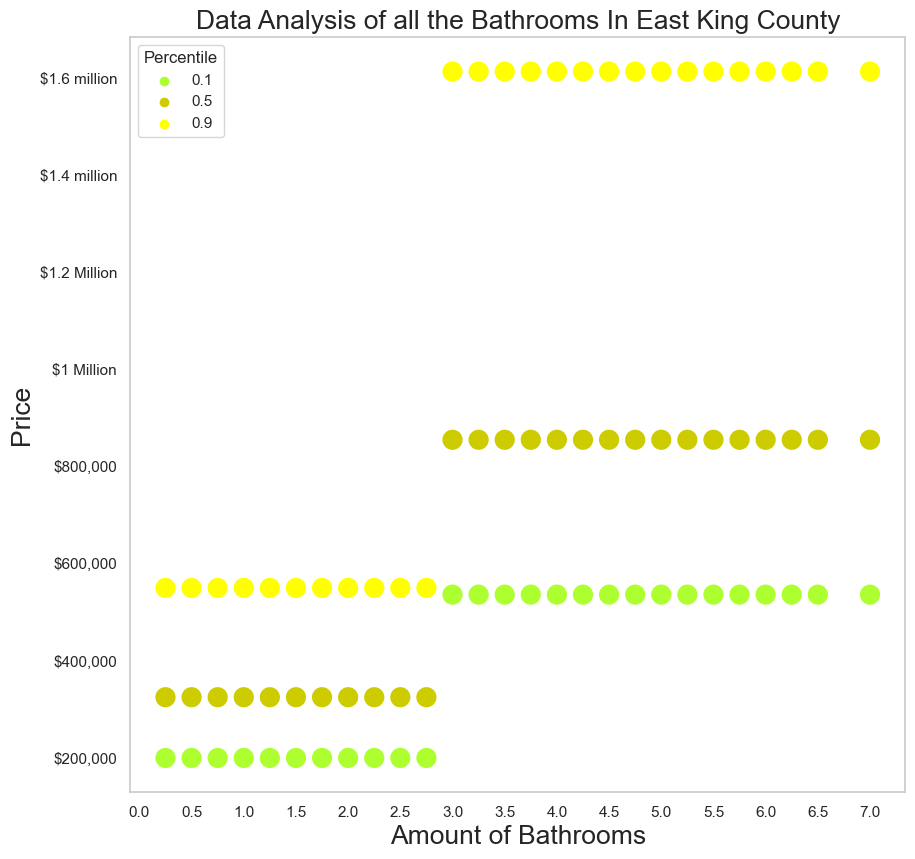

In [164]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax =sns.scatterplot(data=melted_data, x="Amount_of_Bathrooms",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.xticks(np.arange(0,7.5,0.5))    
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Bathrooms In East King County',size=19)
plt.xlabel("Amount of Bathrooms", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000',
         '$800,000','$1 Million', '$1.2 Million','$1.4 million','$1.6 million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Amount of Bathrooms")
plt.gcf().set_size_inches((10,10))

<ipython-input-165-7cac7862e204>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000',


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.2 Million'),
 Text(0, 1400000.0, '$1.4 million'),
 Text(0, 1600000.0, '$1.6 million'),
 Text(0, 1800000.0, '')]

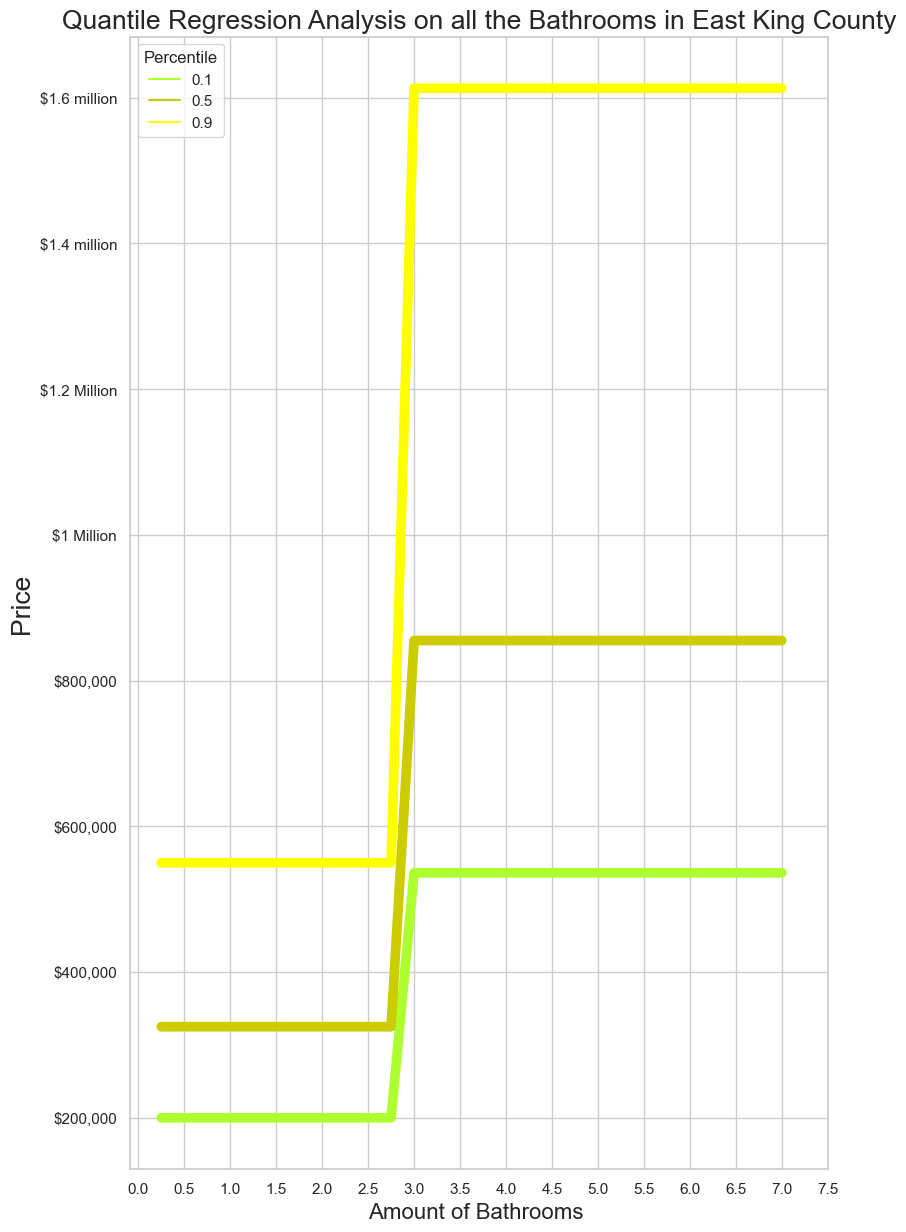

In [165]:
sns.set_style("whitegrid")
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax=sns.lineplot( data=melted_data, x="Amount_of_Bathrooms",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.xticks(np.arange(0,7.75,0.5))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Bathrooms in East King County',size=19)
plt.xlabel("Amount of Bathrooms ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000',
         '$800,000','$1 Million', '$1.2 Million','$1.4 million','$1.6 million'])

In [152]:
(Quantile_regression1['Price'] > Quantile_regression1['0.1']).value_counts()

True     769
False     66
dtype: int64

In [155]:
i = 0
y= 0
x = []
while i < 769:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 66:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

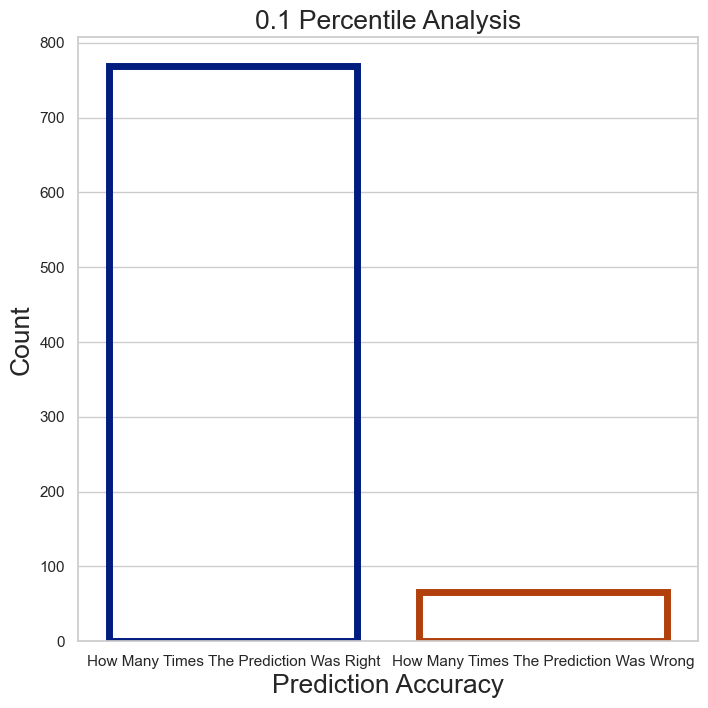

In [156]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [153]:
(Quantile_regression1['Price'] > Quantile_regression1['0.5']).value_counts()

True     541
False    294
dtype: int64

In [157]:
i = 0
y= 0
x = []
while i < 541:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 294:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

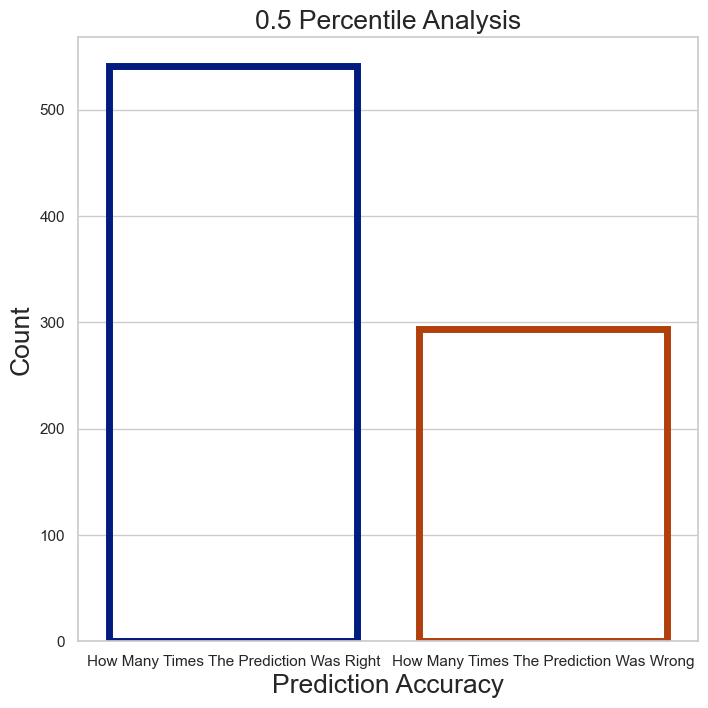

In [158]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [154]:
(Quantile_regression1['Price'] > Quantile_regression1['0.9']).value_counts()

False    669
True     166
dtype: int64

In [159]:
i = 0
y= 0
x = []
while i < 669:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 166:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

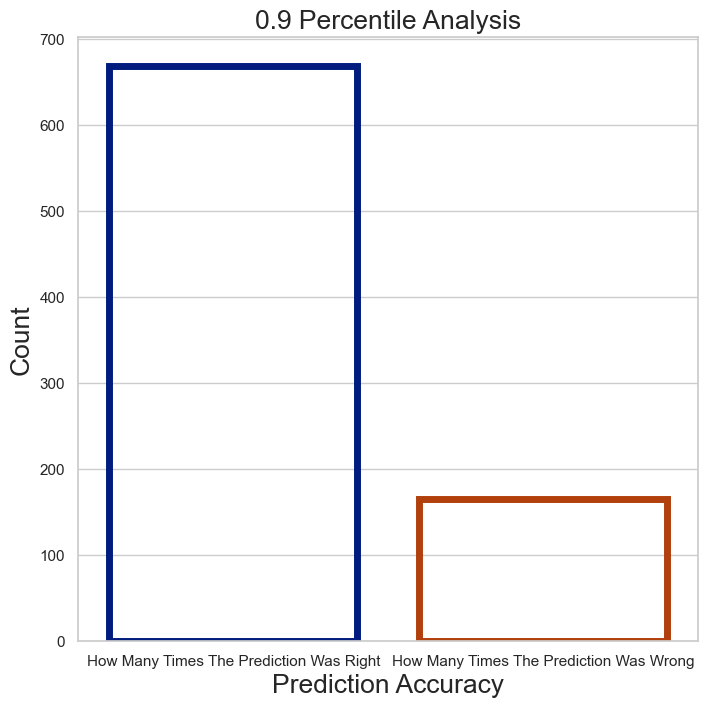

In [160]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [173]:
Predictions1 = []
for i in regressiondata2.Amount_of_Bathrooms:
    if i == 0:Predictions1.append('Between: $200,002 - $550,008')
    if i == 0.5:Predictions1.append('Between: $200,002 - $550,008')
    if i == 0.25:Predictions1.append('Between: $200,002 - $550,008')
    if i == 0.75: Predictions1.append('Between: $200,002 - $550,008')
    if i == 1.0:Predictions1.append('Between: $200,002 - $550,008')
    if i == 1.25:Predictions1.append('Between: $200,002 - $550,008')
    if i == 1.5:Predictions1.append('Between: $200,002 - $550,008') 
    if i == 1.75:Predictions1.append('Between: $200,002 - $550,008')
    if i == 2.0:Predictions1.append('Between: $200,002 - $550,008')
    if i == 2.25:Predictions1.append('Between: $200,002 - $550,008')
    if i == 2.5:Predictions1.append('Between: $200,002 - $550,008') 
    if i == 2.75:Predictions1.append('Between: $200,002 - $550,008')
    if i == 3.0: Predictions1.append('Between: $536,188 - $1,612,980')
    if i == 3.25:Predictions1.append('Between: $536,188 - $1,612,980')
    if i == 3.5:Predictions1.append('Between: $536,188 - $1,612,980') 
    if i == 3.75:Predictions1.append('Between: $536,188 - $1,612,980')
    if i == 4.0:Predictions1.append('Between: $536,188 - $1,612,980')
    if i == 4.25:Predictions1.append('Between: $536,188 - $1,612,980')
    if i == 4.5:Predictions1.append('Between: $536,188 - $1,612,980')
    if i == 4.75: Predictions1.append('Between: $536,188 - $1,612,980')
    if i == 5.0:Predictions1.append('Between: $536,188 - $1,612,980')
    if i == 5.25:Predictions1.append('Between: $536,188 - $1,612,980') 
    if i == 5.5:Predictions1.append('Between: $536,188 - $1,612,980') 
    if i == 5.75:Predictions1.append('Between: $536,188 - $1,612,980') 
    if i == 6.0:Predictions1.append('Between: $536,188 - $1,612,980')
    if i == 6.25:Predictions1.append('Between: $536,188 - $1,612,980')
    if i == 6.5:Predictions1.append('Between: $536,188 - $1,612,980') 
    if i == 6.75:Predictions1.append('Between: $200,002 - $550,008')
    if i == 7:Predictions1.append('Between: $536,188 - $1,612,980')
    if i == 7.25:Predictions1.append('Between: $536,188 - $1,612,980')
    if i == 7.5:Predictions1.append('Between: $536,188 - $1,612,980') 
    if i == 7.75:Predictions1.append('Between: $200,002 - $550,008')
len(Predictions1)

8349

In [174]:
price = []
for i in regressiondata2.Price:
    price.append("${:,.0f}".format(i))
len(price)

8349

In [175]:
Prediction1 = pd.DataFrame({'Amount of Bathrooms':regressiondata2.Amount_of_Bathrooms,
                           'Prediction':Predictions1,'Actual Price':price})
Prediction1

,Amount of Bathrooms,Prediction,Actual Price
0,2.50,"Between: $200,002 - $550,008","$719,000"
1,2.50,"Between: $200,002 - $550,008","$580,500"
2,2.50,"Between: $200,002 - $550,008","$605,000"
3,2.50,"Between: $200,002 - $550,008","$488,000"
4,2.50,"Between: $200,002 - $550,008","$345,000"
...,...,...,...
8344,0.50,"Between: $200,002 - $550,008","$255,000"
8345,6.25,"Between: $536,188 - $1,612,980","$3,300,000"
8346,6.75,"Between: $200,002 - $550,008","$4,670,000"
8347,6.50,"Between: $536,188 - $1,612,980","$1,180,000"


In [176]:
def PRICE_FLOORS(AMOUNT_FLOORS):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode

    amount_floors = house_info['Floors'].tolist()

    floors_index = []
    for i,x in enumerate(amount_floors):
        if x == AMOUNT_FLOORS:floors_index.append(i)
    len(floors_index)
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])

    floors_eastking = []
    for i in floors_index:
        if locations[i] == zip_loca[0] : floors_eastking.append(i)
        elif locations[i] == zip_loca[1] : floors_eastking.append(i)
        elif locations[i] == zip_loca[2] : floors_eastking.append(i)
        elif locations[i] == zip_loca[3] : floors_eastking.append(i)
        elif locations[i] == zip_loca[4]: floors_eastking.append(i)
        elif locations[i] == zip_loca[5] : floors_eastking.append(i)
        elif locations[i] == zip_loca[6] : floors_eastking.append(i)
        elif locations[i] == zip_loca[7]: floors_eastking.append(i)
        elif locations[i] == zip_loca[8] : floors_eastking.append(i)
        elif locations[i] == zip_loca[9] : floors_eastking.append(i)
        elif locations[i] == zip_loca[10] : floors_eastking.append(i)
        elif locations[i] == zip_loca[11] : floors_eastking.append(i)
        elif locations[i] == zip_loca[12]: floors_eastking.append(i)
        elif locations[i] == zip_loca[13] : floors_eastking.append(i)
        elif locations[i] == zip_loca[14] : floors_eastking.append(i)
        elif locations[i] == zip_loca[15] : floors_eastking.append(i)
        elif locations[i] == zip_loca[16]: floors_eastking.append(i)
        elif locations[i] == zip_loca[17] : floors_eastking.append(i)
        elif locations[i] == zip_loca[18]: floors_eastking.append(i)
        elif locations[i] == zip_loca[19] : floors_eastking.append(i)
        elif locations[i] == zip_loca[20]: floors_eastking.append(i)
        elif locations[i] == zip_loca[21] : floors_eastking.append(i)
        elif locations[i] == zip_loca[22] : floors_eastking.append(i)
        elif locations[i] == zip_loca[23] : floors_eastking.append(i)
        elif locations[i] == zip_loca[24] : floors_eastking.append(i)
        elif locations[i] == zip_loca[25] : floors_eastking.append(i)
        elif locations[i] == zip_loca[26] : floors_eastking.append(i)
        elif locations[i] == zip_loca[27] : floors_eastking.append(i)
        elif locations[i] == zip_loca[28]: floors_eastking.append(i)
        elif locations[i] == zip_loca[29] : floors_eastking.append(i)
        elif locations[i] == zip_loca[30] : floors_eastking.append(i)
        elif locations[i] == zip_loca[31]: floors_eastking.append(i)
        elif locations[i] == zip_loca[32] : floors_eastking.append(i)
        elif locations[i] == zip_loca[33] : floors_eastking.append(i)
        elif locations[i] == zip_loca[34] : floors_eastking.append(i)
        elif locations[i] == zip_loca[35]: floors_eastking.append(i)
        elif locations[i] == zip_loca[36] : floors_eastking.append(i)
        elif locations[i] == zip_loca[37] : floors_eastking.append(i)
        elif locations[i] == zip_loca[38] : floors_eastking.append(i)
        elif locations[i] == zip_loca[39] : floors_eastking.append(i)
        elif locations[i] == zip_loca[40] : floors_eastking.append(i)
        elif locations[i] == zip_loca[41] : floors_eastking.append(i)
        elif locations[i] == zip_loca[42] : floors_eastking.append(i)
        elif locations[i] == zip_loca[43]: floors_eastking.append(i)
        elif locations[i] == zip_loca[44] : floors_eastking.append(i)
        elif locations[i] == zip_loca[45] : floors_eastking.append(i)

    price = house_info["Price"].tolist()

    price_eastking = []
    for i in floors_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_floors = house_info["Floors"].value_counts().index.tolist()
price_floors_eastking = []
for i in no_of_floors:
    price_floors_eastking.append(PRICE_FLOORS(i))
price_floors_eastking = sum(price_floors_eastking, [])
len(price_floors_eastking)

8349

In [177]:
def AMOUNT_FLOORS(AMOUNT_FLOORS):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode

    amount_floors = house_info["Floors"].tolist()
    X_value = []
    floors_index = []
    for i,x in enumerate(amount_floors):
        if x == AMOUNT_FLOORS:floors_index.append(i)
            
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])

    for i in floors_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[35] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[36]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[37] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[38] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[39] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[40]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[41] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[42]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[43] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[44]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[45] : X_value.append(AMOUNT_FLOORS)
    return X_value
no_of_floors = house_info["Floors"].value_counts().index.tolist()
amount_floors_eastking = []
for i in no_of_floors:
    amount_floors_eastking.append(AMOUNT_FLOORS(i))
amount_floors_eastking= sum(amount_floors_eastking, [])
len(amount_floors_eastking)

8349

In [178]:
regressiondata3 = pd.DataFrame({'Amount_of_Floors':amount_floors_eastking,
                                'Price':price_floors_eastking})
#regressiondata3.Amount_of_Floors.value_counts()
regressiondata3

,Amount_of_Floors,Price
0,1.0,221900.0
1,1.0,604000.0
2,1.0,229500.0
3,1.0,2000000.0
4,1.0,550000.0
...,...,...
8344,2.5,645000.0
8345,2.5,680000.0
8346,2.5,669950.0
8347,2.5,453000.0


<ipython-input-201-d25546f2b5ed>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million',


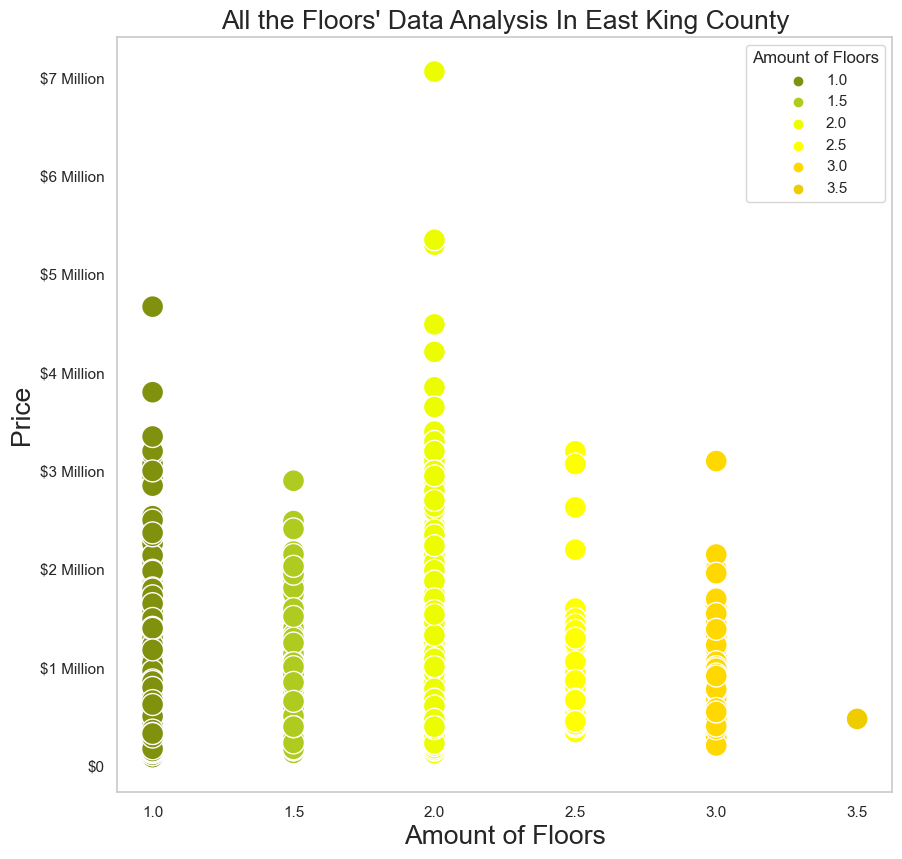

In [201]:
x = regressiondata3['Amount_of_Floors']
y = regressiondata3['Price']
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800','#efcc00']
#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata3, x=x, y=y,s=250, linewidth = 1,
                     hue='Amount_of_Floors', palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Floors\' Data Analysis In East King County',size=19)
plt.xlabel("Amount of Floors", size=19)
plt.legend(title='Amount of Floors')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million',
                    '$4 Million','$5 Million','$6 Million','$7 Million'])
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [202]:
train_df, test_df = train_test_split(regressiondata3, test_size=0.10, shuffle=False)

In [203]:
X_train, y_train = train_df[['Amount_of_Floors']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Floors']], test_df[['Price']]

In [204]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [205]:
Quantile_regression2 = pd.DataFrame({'Amount_of_Floors': X_test.reset_index()['Amount_of_Floors'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [206]:
Quantile_regression2

,Amount_of_Floors,0.1,0.5,0.9,Price
0,1.5,340198.533079,470001.195263,1.316791e+06,795000.0
1,1.5,340198.533079,470001.195263,1.316791e+06,400000.0
2,1.5,340198.533079,470001.195263,1.316791e+06,385200.0
3,1.5,340198.533079,470001.195263,1.316791e+06,428750.0
4,1.5,340198.533079,470001.195263,1.316791e+06,425000.0
...,...,...,...,...,...
830,2.5,359998.002585,614997.343860,1.189995e+06,645000.0
831,2.5,359998.002585,614997.343860,1.189995e+06,680000.0
832,2.5,359998.002585,614997.343860,1.189995e+06,669950.0
833,2.5,359998.002585,614997.343860,1.189995e+06,453000.0


In [208]:
Quantileregression_updated = pd.DataFrame({'Amount_of_Floors':[1.0,1.5,2.0,2.5,3.0,3.5],
    '0.1':[340198.533079,340198.533079,340198.533079,359998.002585,359998.002585,359998.002585],
'0.5':[470001.195263,470001.195263,470001.195263,614997.343860,614997.343860,614997.343860],
'0.9':[1.316791e+06,1.316791e+06,1.316791e+06,1.189995e+06,1.189995e+06,1.189995e+06]})
Quantileregression_updated

,Amount_of_Floors,0.1,0.5,0.9
0,1.0,340198.533079,470001.195263,1316791.0
1,1.5,340198.533079,470001.195263,1316791.0
2,2.0,340198.533079,470001.195263,1316791.0
3,2.5,359998.002585,614997.343860,1189995.0
4,3.0,359998.002585,614997.343860,1189995.0
5,3.5,359998.002585,614997.343860,1189995.0


In [209]:
melted_data = pd.melt(Quantileregression_updated, id_vars=['Amount_of_Floors'])
melted_data = melted_data.dropna()
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

,Amount_of_Floors,Percentile,value
0,1.0,0.1,3.401985e+05
1,1.5,0.1,3.401985e+05
2,2.0,0.1,3.401985e+05
3,2.5,0.1,3.599980e+05
4,3.0,0.1,3.599980e+05
5,3.5,0.1,3.599980e+05
6,1.0,0.5,4.700012e+05
7,1.5,0.5,4.700012e+05
8,2.0,0.5,4.700012e+05
9,2.5,0.5,6.149973e+05


<ipython-input-211-109f261c515f>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$600,000','$800,000','$1 Million','$1.2 Million'])


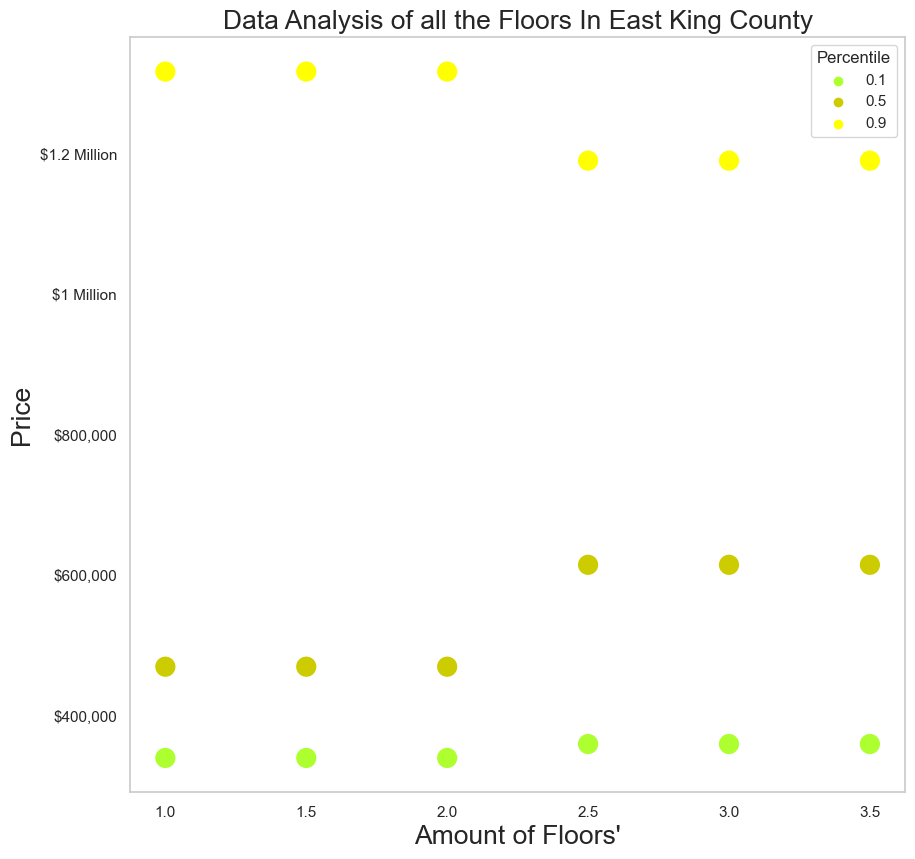

In [211]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax =sns.scatterplot(data=melted_data, x="Amount_of_Floors",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Floors In East King County',size=19)
plt.xlabel("Amount of Floors'", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$600,000','$800,000','$1 Million','$1.2 Million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Amount of Floors'")
plt.gcf().set_size_inches((10,10))

<ipython-input-212-96cee7ba1360>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$600,000','$800,000','$1 Million','$1.2 Million'])


[Text(0, 200000.0, '0'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.2 Million'),
 Text(0, 1400000.0, '')]

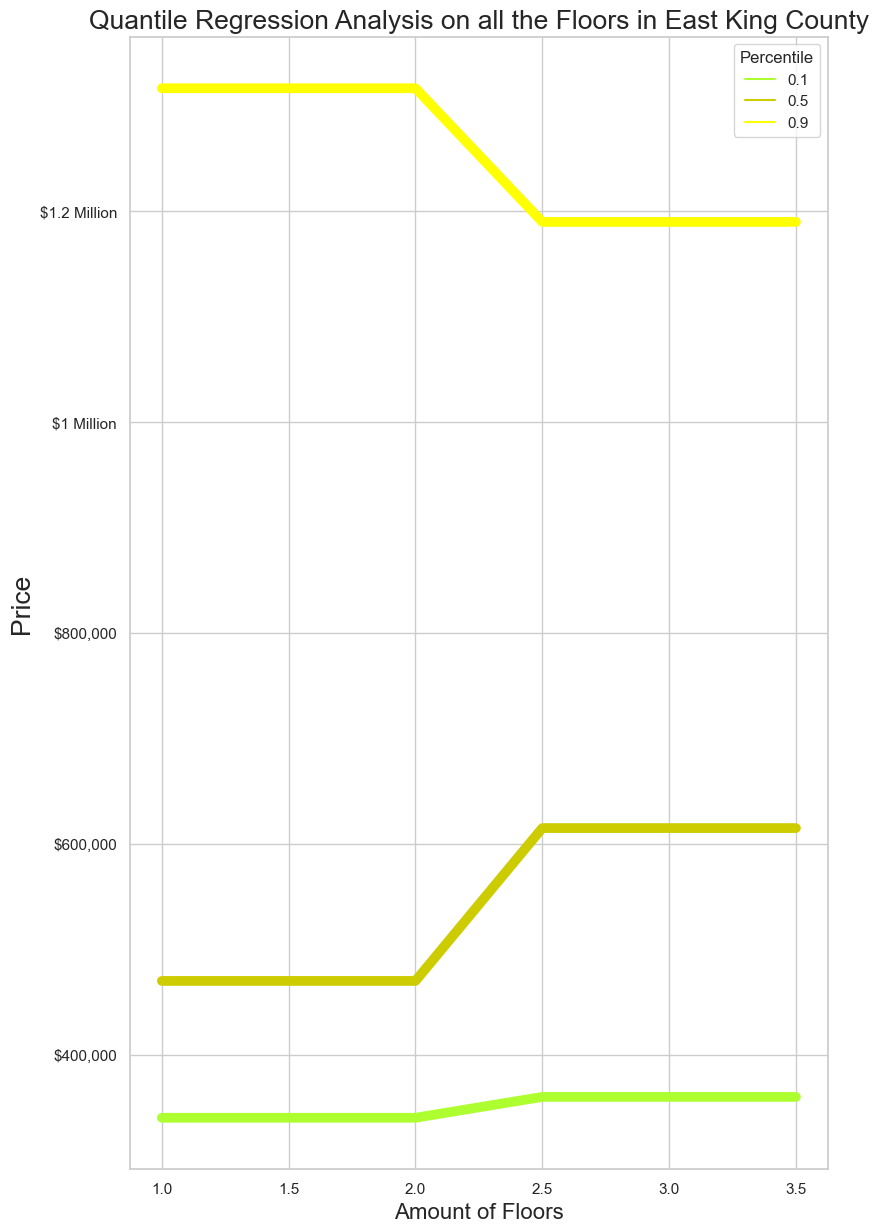

In [212]:
sns.set_style("whitegrid")
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax=sns.lineplot( data=melted_data, x="Amount_of_Floors",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Floors in East King County',size=19)
plt.xlabel("Amount of Floors", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$600,000','$800,000','$1 Million','$1.2 Million'])

In [213]:
(Quantile_regression2['Price'] > Quantile_regression2['0.1']).value_counts()

True     689
False    146
dtype: int64

In [216]:
i = 0
y= 0
x = []
while i < 689:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 146:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [214]:
(Quantile_regression2['Price'] > Quantile_regression2['0.5']).value_counts()

True     447
False    388
dtype: int64

In [217]:
i = 0
y= 0
x = []
while i < 447:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 388:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [215]:
(Quantile_regression2['Price'] > Quantile_regression2['0.9']).value_counts()

False    782
True      53
dtype: int64

In [218]:
i = 0
y= 0
x = []
while i < 782:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 53:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

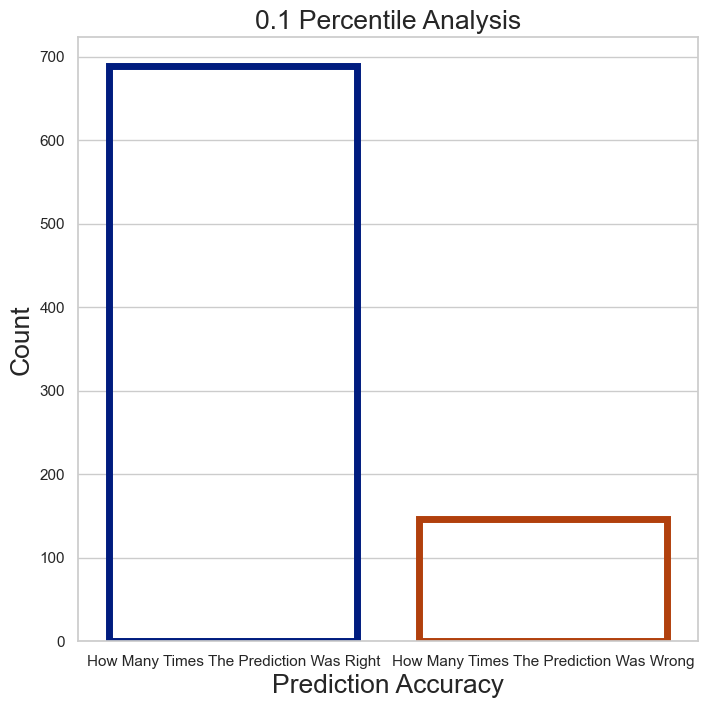

In [219]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

Text(0, 0.5, 'Count')

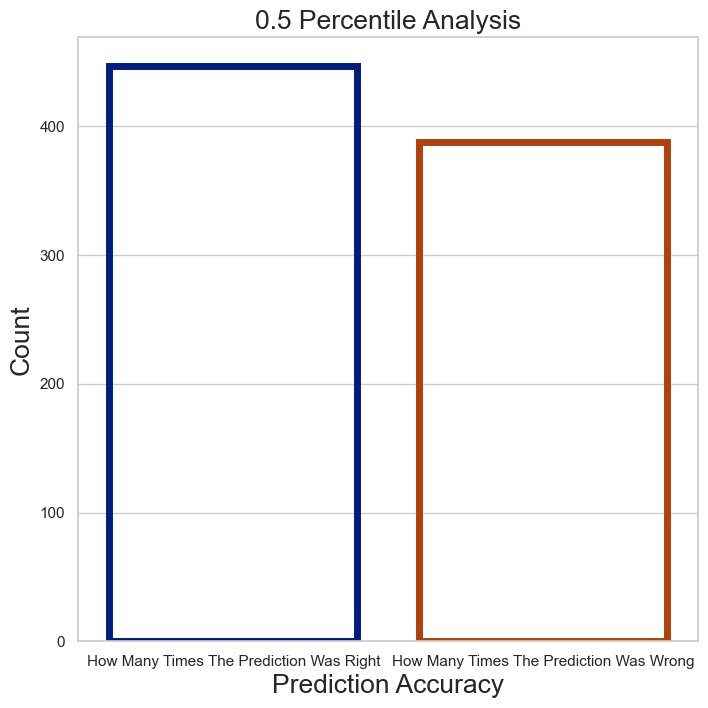

In [220]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

Text(0, 0.5, 'Count')

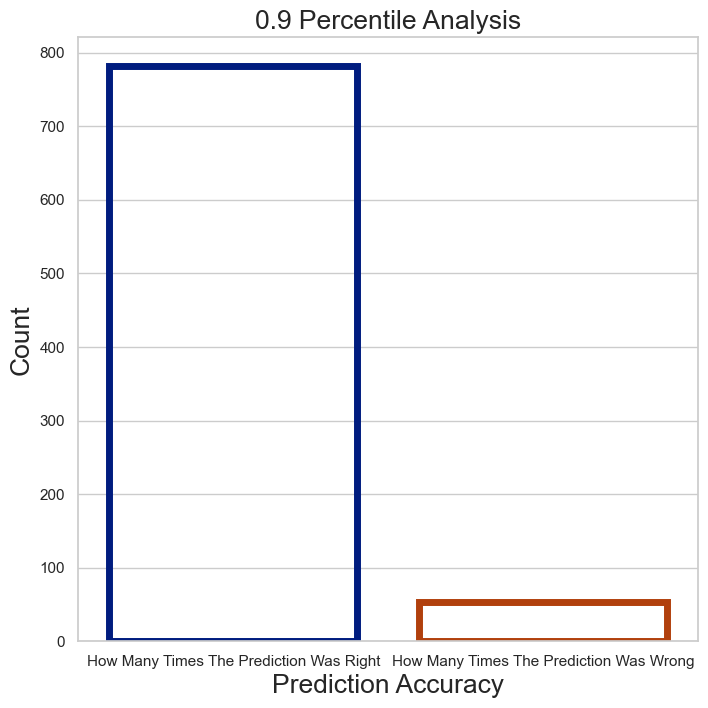

In [221]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [222]:
Predictions2 = []
for i in regressiondata3.Amount_of_Floors:
    if i == 1.0:Predictions2.append('Between: $340,198 - $1,316,791') 
    if i == 1.5:Predictions2.append('Between: $340,198 - $1,316,791') 
    if i == 2.0:Predictions2.append('Between: $340,198 - $1,316,791')
    if i == 2.5:Predictions2.append('Between: $359,998 - $1,189,995') 
    if i == 3.0: Predictions2.append('Between: $359,998 - $1,189,995')
    if i == 3.5: Predictions2.append('Between: $359,998 - $1,189,995')
len(Predictions2)

8349

In [223]:
price = []
for i in regressiondata3.Price:
    price.append("${:,.0f}".format(i))

In [224]:
Prediction2 = pd.DataFrame({'Amount of Floors':regressiondata3.Amount_of_Floors,
                           'Prediction':Predictions2,'Actual Price':price})
Prediction2

,Amount of Floors,Prediction,Actual Price
0,1.0,"Between: $340,198 - $1,316,791","$221,900"
1,1.0,"Between: $340,198 - $1,316,791","$604,000"
2,1.0,"Between: $340,198 - $1,316,791","$229,500"
3,1.0,"Between: $340,198 - $1,316,791","$2,000,000"
4,1.0,"Between: $340,198 - $1,316,791","$550,000"
...,...,...,...
8344,2.5,"Between: $359,998 - $1,189,995","$645,000"
8345,2.5,"Between: $359,998 - $1,189,995","$680,000"
8346,2.5,"Between: $359,998 - $1,189,995","$669,950"
8347,2.5,"Between: $359,998 - $1,189,995","$453,000"


In [226]:
def PRICE_YEARS_BUILT(YEAR_BUILT):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    year_built = house_info['Year Built'].tolist()

    years_built_index = []
    for i,x in enumerate(year_built):
        if x == YEAR_BUILT:years_built_index.append(i)
            
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i]) 

    years_built_eastking = []
    for i in years_built_index:
        if locations[i] == zip_loca[0] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[1] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[2] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[3] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[4]: years_built_eastking.append(i)
        elif locations[i] == zip_loca[5] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[6] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[7]: years_built_eastking.append(i)
        elif locations[i] == zip_loca[8] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[9] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[10] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[11] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[12]: years_built_eastking.append(i)
        elif locations[i] == zip_loca[13] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[14] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[15] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[16]: years_built_eastking.append(i)
        elif locations[i] == zip_loca[17] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[18]: years_built_eastking.append(i)
        elif locations[i] == zip_loca[19] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[20]: years_built_eastking.append(i)
        elif locations[i] == zip_loca[21] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[22] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[23] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[24] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[25] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[26] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[27] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[28]: years_built_eastking.append(i)
        elif locations[i] == zip_loca[29] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[30] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[31]: years_built_eastking.append(i)
        elif locations[i] == zip_loca[32] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[33] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[34] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[35]: years_built_eastking.append(i)
        elif locations[i] == zip_loca[36] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[37] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[38] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[39] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[40] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[41] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[42] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[43]: years_built_eastking.append(i)
        elif locations[i] == zip_loca[44] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[45] : years_built_eastking.append(i)


    price = house_info["Price"].tolist()

    price_eastking = []
    for i in years_built_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_Year = house_info["Year Built"].value_counts().index.tolist()
price_Year_eastking = []
for i in no_of_Year:
    price_Year_eastking.append(PRICE_YEARS_BUILT(i))
price_Year_eastking = sum(price_Year_eastking, [])
len(price_Year_eastking)

8349

In [227]:
def AMOUNT_YEARS_BUILT(AMOUNT_YEARS):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    years_built = house_info["Year Built"].tolist()
    X_value = []
    years_index = []
    for i,x in enumerate(years_built):
        if x == AMOUNT_YEARS:years_index.append(i)
            
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])

    for i in years_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[35] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[36]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[37] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[38] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[39] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[40]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[41] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[42]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[43] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[44]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[45] : X_value.append(AMOUNT_YEARS)

    return X_value
no_of_years = house_info["Year Built"].value_counts().index.tolist()
amount_years_eastking = []
for i in no_of_years:
    amount_years_eastking.append(AMOUNT_YEARS_BUILT(i))
amount_years_eastking= sum(amount_years_eastking, [])
len(amount_years_eastking)

8349

In [230]:
regressiondata4 = pd.DataFrame({'Year_Built':amount_years_eastking,
                                'Price':price_Year_eastking})
regressiondata4

,Year_Built,Price
0,2014,453246.0
1,2014,802541.0
2,2014,1220000.0
3,2014,1680000.0
4,2014,599950.0
...,...,...
8344,1934,750000.0
8345,1934,275000.0
8346,1934,529000.0
8347,1934,2030000.0


In [231]:
year = regressiondata4['Year_Built'].value_counts()
year

2014    243
2006    217
2005    205
2007    204
2004    202
       ... 
1936     14
1902     12
1901     11
1935      8
1934      6
Name: Year_Built, Length: 116, dtype: int64